In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.0.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

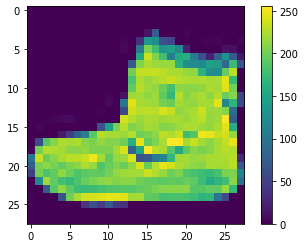

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

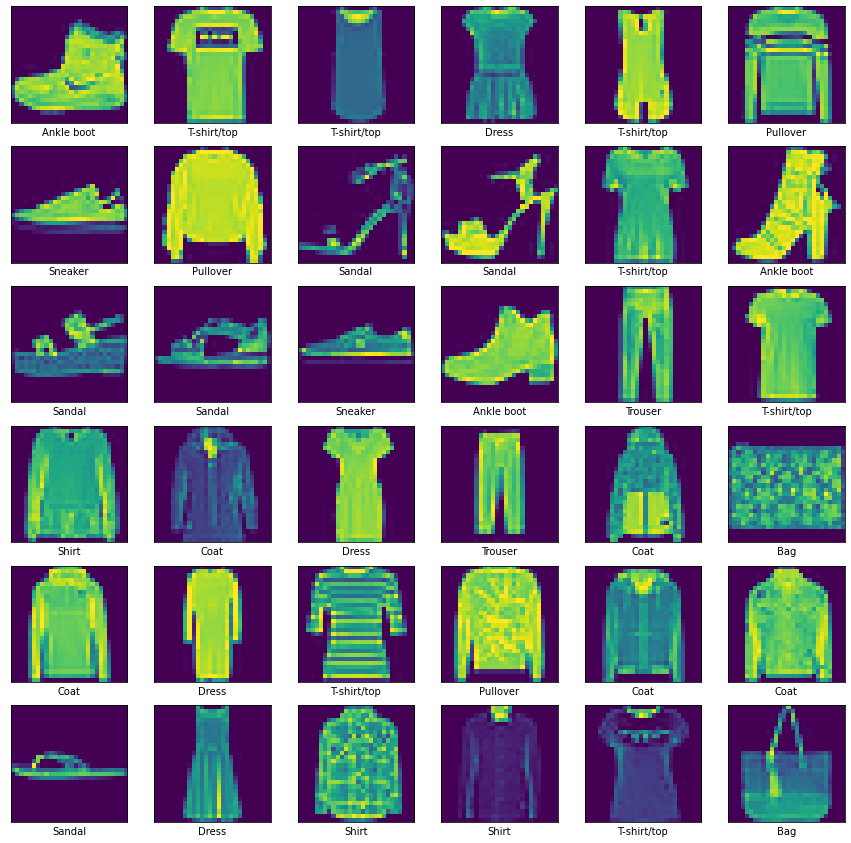

In [13]:
plt.figure(figsize=(15,15))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) #原色
    #plt.imshow(train_images[i],cmap=plt.cm.binary) #黑白色
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])
model.fit(train_images,train_labels,epochs=10)

2022-01-21 13:16:04.873224: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 13:16:04.875102: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4974 - accuracy: 0.8267
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3748 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3382 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3126 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2939 - accuracy: 0.8919
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2789 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2691 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2551 - accuracy: 0.9048
Epoch 9/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2469 - accuracy: 0.9076
Epoch 10/10
6

In [15]:
test_lose,test_accu = model.evaluate(test_images,test_labels,verbose=2)

10000/1 - 0s - loss: 0.2181 - accuracy: 0.8827


In [16]:
probability_model = keras.Sequential([
    model,
    keras.layers.Softmax()
])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([6.4461062e-08, 2.1768042e-08, 3.0321152e-09, 1.2658543e-11,
       7.1550526e-09, 2.5524976e-04, 2.6483431e-09, 3.0838072e-03,
       1.1468106e-09, 9.9666083e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
np.argmax(predictions[100])

3

In [22]:
test_labels[100]

3

In [23]:
single_img = test_images[99]

In [24]:
single_img = (np.expand_dims(single_img,0))

In [25]:
single_img.shape

(1, 28, 28)

In [26]:
single_prediction = probability_model.predict(single_img)

In [27]:
np.argmax(single_prediction[0])

2

In [28]:
test_labels[99]

2